<a href="https://colab.research.google.com/github/suy379/do_it_DL_intro/blob/main/09_%EC%88%9C%ED%99%98_%EC%8B%A0%EA%B2%BD%EB%A7%9D(%ED%85%8D%EC%8A%A4%ED%8A%B8_%EC%9D%B4%EC%A7%84%EB%B6%84%EB%A5%98)%2B%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95%2C_%EC%BC%80%EB%9D%BC%EC%8A%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 09. 순환 신경망 for 텍스트 이진분류 
- 09-1. 순차 데이터, 순환 신경망이란?
- 09-2. 순환 신경망 손코딩
- 09-3. 텐서플로로 순환 신경망 만들기
- 09-4. LSTM 순환 신경망 만들기

## 09-2. 순환 신경망을 이용한 __텍스트 이진 분류__
- 텍스트 데이터를 순환 신경망에 적용하기 위해선 적절한 방법으로 변환이 필요.
- 이용하려는 데이터는 IMDB 데이터 세트이고, 이 리뷰들이 긍정적인지 부정적인지 판별.

In [1]:
#데이터 불러오기
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
(x_train_all, y_train_all), (x_test, y_test) = imdb.load_data(skip_top=20, num_words=100)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [2]:
print(x_train_all.shape, y_train_all.shape)

(25000,) (25000,)


#### 데이터 살펴보기(훈련셋)

In [3]:
#훈련셋 확인
print(x_train_all[0])
print(len(x_train_all[0]))

[2, 2, 22, 2, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 2, 2, 36, 2, 2, 25, 2, 43, 2, 2, 50, 2, 2, 2, 35, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 39, 2, 2, 2, 2, 2, 2, 38, 2, 2, 2, 2, 50, 2, 2, 2, 2, 2, 2, 22, 2, 2, 2, 2, 2, 22, 71, 87, 2, 2, 43, 2, 38, 76, 2, 2, 2, 2, 22, 2, 2, 2, 2, 2, 2, 2, 2, 2, 62, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 66, 2, 33, 2, 2, 2, 2, 38, 2, 2, 25, 2, 51, 36, 2, 48, 25, 2, 33, 2, 22, 2, 2, 28, 77, 52, 2, 2, 2, 2, 82, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 2, 2, 2, 2, 2, 2, 88, 2, 2, 2, 2, 98, 32, 2, 56, 26, 2, 2, 2, 2, 2, 2, 2, 22, 21, 2, 2, 26, 2, 2, 2, 30, 2, 2, 51, 36, 28, 2, 92, 25, 2, 2, 2, 65, 2, 38, 2, 88, 2, 2, 2, 2, 2, 2, 2, 2, 32, 2, 2, 2, 2, 2, 32]
218


- IMDB 데이터셋은 텍스트 데이터긴 하지만 미리 텍스트를 고유한 정수로 바꾸어 놓았다.
- BoW 방법을 이용하여 영단어를 고유한 정수에 일대일 대응함.
- 여기서 2가 가장 많은데 2는 사전에 없는 단어를 의미하므로 삭제.

In [4]:
for i in range(len(x_train_all)):
    x_train_all[i] = [w for w in x_train_all[i] if w>2] #w값이 2보다 큰 것만 반환 
print(x_train_all[0])

[22, 43, 65, 66, 36, 25, 43, 50, 35, 39, 38, 50, 22, 22, 71, 87, 43, 38, 76, 22, 62, 66, 33, 38, 25, 51, 36, 48, 25, 33, 22, 28, 77, 52, 82, 36, 71, 43, 26, 46, 88, 98, 32, 56, 26, 22, 21, 26, 30, 51, 36, 28, 92, 25, 65, 38, 88, 32, 32]


In [5]:
#어휘 사전을 내려받아 숫자를 영단어로 바꾸기
word_to_index = imdb.get_word_index()
word_to_index['movie'] #예를들어 movie는 숫자 17에 대응. (어휘사전은 딕셔너리로 되어있는데, key는 영단어 & value는 숫자임.)

1646592/1641221 [==============================] - 0s 0us/step


17

In [6]:
#편의상 key가 숫자, value가 영단어인 게 편하다.(딕셔너리는 key값을 인덱싱에 이용하니까)
#그래서 word_to_index를 거꾸로 한 index_to_word를 만듦
index_to_word = {word_to_index[k]: k for k in word_to_index} #딕셔너리니까 콜론(:) 꼭 써줘야 함.
#index_to_word

In [7]:
#index_to_word 사전을 활용하여 훈련셋의 숫자-> 영단어로 변형
for w in x_train_all[0]:
    print(index_to_word[w-3], end=' ') #훈련셋 숫자는 3 이상부터가 영단어이므로.

film just story really they you just there an from so there film film were great just so much film would really at so you what they if you at film have been good also they were just are out because them all up are film but are be what they have don't you story so because all all 

In [8]:
print(len(x_train_all[0]), len(x_train_all[1]))

59 32


In [9]:
#훈련셋의 타깃
print(y_train_all[:10])

[1 0 0 1 0 0 1 0 1 0]


In [10]:
#훈련셋 중 5000개 검증셋으로 떼어내기(랜덤 인덱스 활용)
np.random.seed(42)
random_index = np.random.permutation(25000)
print(random_index[:5]) #이렇게 인덱스가 랜덤으로 섞임

[ 6868 24016  9668 13640 14018]


In [11]:
#train set, val set으로 분리
x_train = x_train_all[random_index[:20000]]
y_train = y_train_all[random_index[:20000]]
x_val = x_train_all[random_index[20000:]]
y_val = y_train_all[random_index[20000:]]
print(x_train.shape, x_val.shape)

(20000,) (5000,)


#### 샘플의 길이 맞추기
- 현재 X데이터는 길이가 인덱스별로 다르므로, 최대길이를 100으로 하여 이를 넘기면 잘라내고 이보다 짧으면 왼쪽에 0을 채운다.

In [12]:
from tensorflow.keras.preprocessing import sequence

maxlen=100
x_train_seq = sequence.pad_sequences(x_train, maxlen=maxlen)
x_val_seq = sequence.pad_sequences(x_val, maxlen=maxlen)

print(x_train_seq.shape, x_val_seq.shape)

(20000, 100) (5000, 100)


In [13]:
print(x_train_seq[0]) #이렇게 100보다 짧으므로 왼쪽에 0이 채워져 있다.

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 35 40 27 28 40 22 83 31 85 45
 24 23 31 70 31 76 30 98 32 22 28 51 75 56 30 33 97 53 38 46 53 74 31 35
 23 34 22 58]


#### 샘플 __원-핫 인코딩__
- 이미 타겟은 0 or 1의 값만 갖고있으므로 할필요 없고 입력(X)에 대해서만 진행

In [14]:
from tensorflow.keras.utils import to_categorical

x_train_onehot = to_categorical(x_train_seq)
x_val_onehot = to_categorical(x_val_seq)

In [15]:
print(x_train_onehot.shape, x_val_onehot.shape)

(20000, 100, 100) (5000, 100, 100)


In [16]:
print(x_train_onehot[0])

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [17]:
print(x_train_onehot.nbytes) #샘플을 100개의 단어로 제한했는데도 메모리 크기가 큰편.

800000000


### 순환 신경망 클래스(RecurrentNetwork) 구현
- 06장의 MiniBatchNetwork 기반으로, 서로 다른 부분만 구현함.
- [수정] init, init_weights에서 초기 가중치 설정하는 부분 & forpass(Z2 출력 및 h 은닉상태 리스트에 기록) & backprop(그레디언트들 출력) 
- 순환층에 tanh, 이진분류이므로 출력층에 sigmoid 적용.

In [18]:
list1= [1,4,6,9,12]
print(list1[:-1])
print(list1[::-1])

[1, 4, 6, 9]
[12, 9, 6, 4, 1]


In [19]:
class RecurrentNetwork:
    def __init__(self, n_cells=10, batch_size=32, learning_rate=0.1): #n_cells는 순환층의 뉴런 수(디폴트: 10)
        self.n_cells = n_cells
        self.batch_size = batch_size
        #순환층의 가중치와 절편
        self.w1h = None
        self.w1x = None
        self.b1 = None
        #출력층의 가중치와 절편
        self.w2 = None
        self.b2 = None
        #순환층의 활성화 출력값(역방향 계산에서 사용)
        self.h = None
        #기록 
        self.losses = [] #train_loss
        self.val_losses = [] #val_loss
        self.lr = learning_rate

    #정방향 메서드 forpass: Z2 출력 & self.h에 은닉 상태들 모두 기록 
    def forpass(self, x):
        self.h = [np.zeros((x.shape[0], self.n_cells))] #모든 값이 0인 리스트 생성(추후 은닉상태 Hp, Hpp,...들 append하여 기록)
        seq = np.swapaxes(x, 0, 1) #계산 편의를 위해 배치 차원-스탭 차원 바꿈
        for x in seq:
            z1 = np.dot(x, self.w1x) + np.dot(self.h[-1], self.w1h) + self.b1
            h = np.tanh(z1)
            self.h.append(h) #h들 기록 
            z2 = np.dot(h, self.w2) + self.b2
        return z2 

    #정방향 sigmoid --> 출력층의 z2에 적용.
    def sigmoid(self, z):
        a = 1/(1+np.exp(-z))
        return a

    #역방향 메서드 backprop--> 출력: (출력층)w2_grad, b2_grad / (순환층)w1h_grad, w1x_grad, b1_grad
    ##err는 만들어져 있다고 생각(fit에서 만듦)
    def backprop(self, x, err):
        m = len(x) #평균 그레디언트를 계산해야 해서 m으로 나눠줘야 함을 잊지말것

        #출력층 
        w2_grad = np.dot(self.h[-1].T, err) / m
        b2_grad = np.sum(err) / m

        #초기화
        seq = np.swapaxes(x, 0, 1)
        w1h_grad = w1x_grad = b1_grad = 0
        err_to_cell = np.dot(err, self.w2.T) * (1-self.h[-1]**2) #초기화 

        #순환층 
        for x, h in zip(seq[::-1][:10], self.h[:-1][::-1][:10]):
            w1h_grad += np.dot(h.T, err_to_cell)
            w1x_grad += np.dot(x.T, err_to_cell)
            b1_grad += np.sum(err_to_cell, axis=0)
            #err_to_cell을 for문 안에서 다시 정의-초기화됐었던 err_to_cell 값 바뀜.
            err_to_cell = np.dot(err_to_cell, self.w1h) * (1-h**2)
        
        w1h_grad /= m
        w1x_grad /= m
        b1_grad /=m

        return w1h_grad, w1x_grad, b1_grad, w2_grad, b2_grad 

    #가중치 초기화(순환셀 은닉상태 가중치 초기화는 orthogonal, 그냥 가중치 초기화는 glorot_uniform 사용)

    def init_weights(self, n_features, n_classes): 
        orth_init = tf.initializers.orthogonal()
        glorot_init = tf.initializers.glorot_uniform()

        self.w1h = orth_init((self.n_cells, self.n_cells)).numpy()
        self.w1x = glorot_init((n_features, self.n_cells)).numpy()
        self.b1 = np.zeros(self.n_cells)
        self.w2 = glorot_init((self.n_cells, n_classes)).numpy()
        self.b2 = np.zeros(n_classes)
        
    ## get_batch 메서드 추가 --> x,y가 들어오면 랜덤하게 batch_size만큼 x_batch, y_batch 뽑아 출력
    def gen_batch(self, x, y):
        length = len(x)
        bins = length // self.batch_size #미니배치의 횟수 
        if length % self.batch_size: #나머지가 있다면 횟수 +1 
            bins +=1 
        #인덱스 랜덤 섞기
        indexes = np.random.permutation(np.arange(len(x)))
        x = x[indexes]
        y = y[indexes]
        #미니배치 횟수만큼 실행 
        for i in range(bins):
            #인덱스 설정하여 나눠줌 
            start = self.batch_size*i
            end = self.batch_size*(i+1)
            yield x[start:end], y[start:end] #x_batch, y_batch 반환. (return으로 해도 되는데 메모리 사용이 효율적인 제너레이터로 접근함.)

    #fit 메서드 ->"epoch마다"  training에서 A2를 받아 Loss를 계산 & training에서 가중치 업데이트가 일어나도록 함.
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        #타겟 열벡터 변환
        y = y.reshape(-1,1)
        y_val = y_val.reshape(-1,1)
        self.init_weights(x.shape[2], y.shape[1]) #n_features, n_classes 값 넣음 
        np.random.seed(42) #실습결과와 동일함을 위해(실전에선 x)
        #epoch만큼 반복
        for i in range(epochs):
            print('에포크', i, end=' ')
            batch_losses = []
            for x_batch, y_batch in self.gen_batch(x,y): #뒤의 gen_batch 메서드에서 배치사이즈만큼의 x_batch, y_batch 꺼냄
                print('.', end='')
                a = self.training(x_batch, y_batch) #뒤의 training 메서드에서 수행 & 가중치 업데이트(출력값: A2)
                #loss 계산(평균 loss로 반환)
                a = np.clip(a, 1e-10, 1-1e-10)
                loss = np.mean(-(y_batch*np.log(a) + (1-y_batch)*np.log(1-a))) #각 batch마다의 평균loss 저장 
                batch_losses.append(loss) 
            print( ) #각 epoch 수행시마다 빈칸출력 
            self.losses.append(np.mean(batch_losses))
            self.update_val_loss(x_val, y_val)

    #검증셋 손실계산(val_loss) -> update_val_loss
    def update_val_loss(self, x_val, y_val):
        z = self.forpass(x_val) #z2
        a = self.sigmoid(z) #a2 -> loss 계산 가능!
        #loss 계산
        a = np.clip(a, 1e-10, 1-1e-10)
        val_loss = np.mean(-(y_val*np.log(a) + (1-y_val)*np.log(1-a)))
        self.val_losses.append(val_loss)


    #training 메서드: 정방향 계산, err 계산, 오차 역전파(가중치 업데이트)
    def training(self, x, y):
        m = len(x)
        z = self.forpass(x) #z2 반환
        a = self.sigmoid(z) #A2 반환 => loss 계산 가능!
        err = -(y-a)
        #그레디언트 값 계산
        w1h_grad, w1x_grad, b1_grad, w2_grad, b2_grad = self.backprop(x, err)
        #가중치, 절편 업데이트(학습률도 곱해줘야 한다!)
        self.w1h -= w1h_grad*self.lr
        self.w1x -= w1x_grad*self.lr
        self.b1 -= b1_grad*self.lr
        self.w2 -= w2_grad*self.lr
        self.b2 -= b2_grad*self.lr 
        return a 


    ## 예측, 평가 메서드 --> val set 넣음.
    #predict(예측) 메서드
    def predict(self, x):
        z = self.forpass(x) #Z2 반환
        return z>0
    
    #score(평가) 메서드
    def score(self, x, y):
        return np.mean(self.predict(x)==y.reshape(-1,1))


#### 순환 신경망 모델 훈련시키기
- 셀 개수(은닉층 뉴런수)=32개, 배치 크기=32, 학습률=0.01, 에포크=20, 타임 스텝 횟수=10회 (모두 하이퍼 파라미터)
- 하이퍼 파라미터는 여러 번 반복하여 가장 적절한 값을 찾아야 함.

In [20]:
#객체
rn = RecurrentNetwork(n_cells=32, batch_size=32, learning_rate=0.01)
#학습
rn.fit(x_train_onehot, y_train, epochs=20, x_val = x_val_onehot, y_val = y_val)

에포크 0 .................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................
에포크 1 ..........................................................................................................................................................................................................................................................................................................................................................................

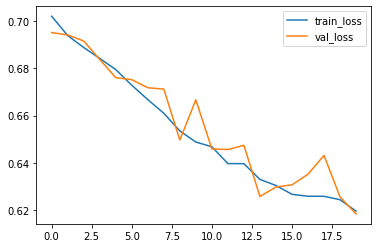

In [26]:
#train loss vs. val_loss
import matplotlib.pyplot as plt
plt.plot(rn.losses)
plt.plot(rn.val_losses)
plt.legend(['train_loss','val_loss'])
plt.show()

In [27]:
#성능 평가
rn.score(x_val_onehot, y_val)

0.6586

- 성능이 좋은 편은 아니지만(약 69%), 무작위로 긍/부정을 예측하는 확률 50%보다는 높게 나왔다.
- 텐서플로와 같은 고급 딥러닝 패키지를 활용하여 좀 더 좋은 성능을 내보자.

## 09-3. 텐서플로를 이용해 순환 신경망 만들기
- 텐서플로에서 가장 기본적인 순환층은 `SimpleRNN` 클래스이다. 이번엔 이를 이용해 순환 신경망-이진분류를 만들어보자.

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

In [29]:
model = Sequential()
#순환층(즉, 은닉층. 셀은 32개)
model.add(SimpleRNN(32, input_shape=(100,100))) #배치를 제외한 나머지 차원-> 반드시 첫번쨰 층에 입력해야 함.
#출력층(뉴런 1개. 왜냐면 이진분류이므로 c=1)
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 32)                4256      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 4,289
Trainable params: 4,289
Non-trainable params: 0
_________________________________________________________________


In [30]:
100*32+32*32+32

4256

In [31]:
20000/32

625.0

In [32]:
#모델 컴파일
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
#훈련
history = model.fit(x_train_onehot, y_train, epochs=20, batch_size=32, validation_data=(x_val_onehot, y_val))

Epoch 1/20
625/625 [==============================] - 12s 18ms/step - loss: 0.7030 - accuracy: 0.5105 - val_loss: 0.6838 - val_accuracy: 0.5628
Epoch 2/20
625/625 [==============================] - 11s 17ms/step - loss: 0.6781 - accuracy: 0.5765 - val_loss: 0.6576 - val_accuracy: 0.6138
Epoch 3/20
625/625 [==============================] - 11s 17ms/step - loss: 0.6480 - accuracy: 0.6289 - val_loss: 0.6356 - val_accuracy: 0.6440
Epoch 4/20
625/625 [==============================] - 11s 17ms/step - loss: 0.6330 - accuracy: 0.6419 - val_loss: 0.7363 - val_accuracy: 0.5374
Epoch 5/20
625/625 [==============================] - 11s 17ms/step - loss: 0.6141 - accuracy: 0.6672 - val_loss: 0.5945 - val_accuracy: 0.6908
Epoch 6/20
625/625 [==============================] - 11s 17ms/step - loss: 0.6007 - accuracy: 0.6786 - val_loss: 0.6986 - val_accuracy: 0.5890
Epoch 7/20
625/625 [==============================] - 11s 17ms/step - loss: 0.5974 - accuracy: 0.6819 - val_loss: 0.5861 - val_accuracy:

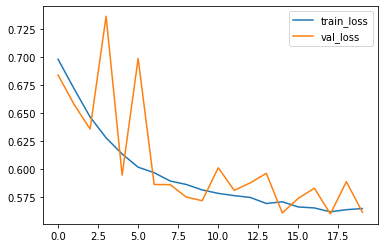

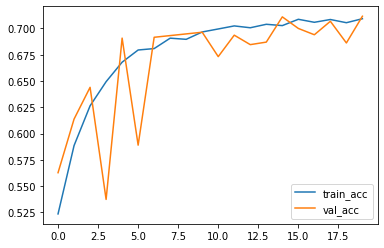

In [33]:
#train_loss vs. val_loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train_loss', 'val_loss'])
plt.show()

#train_acc vs. val_acc
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train_acc', 'val_acc'])
plt.show()

In [34]:
#검증셋 정확도 평가
loss, acc = model.evaluate(x_val_onehot, y_val, verbose=0)
print(acc)

0.7116000056266785


- 텐서플로를 이용해 구현했음에도 아까 손코딩 한 결과와 크게 달라지지 않았다(약 70%).
- 특히 loss, accuracy 그래프를 보면 train set에 비해 val set의 결과는 매우 들쭉날쭉하다.
- __해결책__: 우리의 문제는 바로 _텍스트 데이터를 원-핫 인코딩했다는 것_! 원-핫 인코딩은 텍스트 간 상관성을 전혀 반영하지 못하므로, __단어 임베딩(word embedding)__을 활용한다.
- 단어 임베딩에는 다양한 방법들이 있지만, 여기서는 __keras의 embedding__을 활용. (참고: https://www.dacon.io/codeshare/1847?dtype=recent)

In [35]:
#다시 훈련 데이터 전처리(원-핫 인코딩 전 부분까지)
(x_train_all, y_train_all), (x_test, y_test) = imdb.load_data(skip_top=20, num_words=1000) #이번엔 1000개 단어까지!

for i in range(len(x_train_all)):
    x_train_all[i] = [w for w in x_train_all[i] if w>2]

print(x_train_all[0]) #확실히 텍스트가 갖고 있는 고유숫자가 0~1000 범위까지 늘어났다.

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

[22, 43, 530, 973, 65, 458, 66, 173, 36, 256, 25, 100, 43, 838, 112, 50, 670, 35, 480, 284, 150, 172, 112, 167, 336, 385, 39, 172, 546, 38, 447, 192, 50, 147, 22, 469, 22, 71, 87, 43, 530, 38, 76, 22, 515, 626, 62, 386, 316, 106, 480, 66, 33, 130, 38, 619, 25, 124, 51, 36, 135, 48, 25, 33, 22, 215, 28, 77, 52, 407, 82, 107, 117, 256, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 104, 88, 381, 297, 98, 32, 56, 26, 141, 194, 226, 22, 21, 134, 476, 26, 480, 144, 30, 51, 36, 28, 224, 92, 25, 104, 226, 65, 38, 88, 283, 113, 103, 32, 178, 32]


In [36]:
print(x_train_all.shape, y_train_all.shape)

(25000,) (25000,)


In [37]:
#랜덤 인덱스 반환으로 train/val set 나눔(각각 2만개, 5천개)
x_train = x_train_all[random_index[:20000]]
y_train = y_train_all[random_index[:20000]]
x_val = x_train_all[random_index[20000:]]
y_val = y_train_all[random_index[20000:]]

print(x_train.shape, x_val.shape, y_train.shape, y_val.shape) #y는 열벡터!(y엔 더이상 전처리 진행x)

(20000,) (5000,) (20000,) (5000,)


In [38]:
#패딩을 통해 타임 스텝 크기 100으로 맞춤.
maxlen = 100
x_train_seq = sequence.pad_sequences(x_train, maxlen=maxlen)
x_val_seq = sequence.pad_sequences(x_val, maxlen=maxlen)

print(x_train_seq.shape, x_val_seq.shape)

(20000, 100) (5000, 100)


In [39]:
print(x_train_seq[0])
print(len(x_train_seq[0]))

[  0   0   0   0   0 225 678 200  35 204 129 629 599 399  40  27 768  28
 224 331 917  40  22 677  83 778  31 103  85 702 116  45  24 196 159 369
 471  23  31 160  70 759  31 160  76 329 181  30 172  98  32 934 225 813
 496 863  22 100  28 952 957 329 472  51  75 130  56 862 105 625 186  30
 168 307  33 454  97  53 229  38 563 529  46 414 450 117  53  74  31  35
  23 268  34 167  22 231 450 771 798  58]
100


In [40]:
#이제 단어 임베딩 적용!!!
from tensorflow.keras.layers import Embedding

model_ebd = Sequential()
model_ebd.add(Embedding(1000, 32)) #임베딩층 추가(vocab_size=1000, 단어 임베딩 차원 100->32로 줄임)
#순환층(셀개수;은닉층 뉴런수=8로 줄임. 임베딩층 성능이 좋아서 셀 개수 줄여도 성능 좋을것임)
model_ebd.add(SimpleRNN(8))
#출력층
model_ebd.add(Dense(1, activation='sigmoid'))

model_ebd.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          32000     
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 8)                 328       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 32,337
Trainable params: 32,337
Non-trainable params: 0
_________________________________________________________________


In [41]:
32*8+8*8+8

328

In [42]:
#모델 컴파일
model_ebd.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#학습
his = model_ebd.fit(x_train_seq, y_train, epochs=10, batch_size=32,
                    validation_data = (x_val_seq, y_val))

Epoch 1/10
625/625 [==============================] - 13s 19ms/step - loss: 0.5427 - accuracy: 0.7230 - val_loss: 0.4194 - val_accuracy: 0.8186
Epoch 2/10
625/625 [==============================] - 11s 18ms/step - loss: 0.3838 - accuracy: 0.8379 - val_loss: 0.3939 - val_accuracy: 0.8344
Epoch 3/10
625/625 [==============================] - 11s 18ms/step - loss: 0.3383 - accuracy: 0.8615 - val_loss: 0.4292 - val_accuracy: 0.8100
Epoch 4/10
625/625 [==============================] - 11s 18ms/step - loss: 0.3128 - accuracy: 0.8735 - val_loss: 0.4019 - val_accuracy: 0.8296
Epoch 5/10
625/625 [==============================] - 11s 18ms/step - loss: 0.2967 - accuracy: 0.8788 - val_loss: 0.4097 - val_accuracy: 0.8264
Epoch 6/10
625/625 [==============================] - 11s 18ms/step - loss: 0.2587 - accuracy: 0.9001 - val_loss: 0.4718 - val_accuracy: 0.8146
Epoch 7/10
625/625 [==============================] - 11s 18ms/step - loss: 0.2512 - accuracy: 0.9019 - val_loss: 0.4366 - val_accuracy:

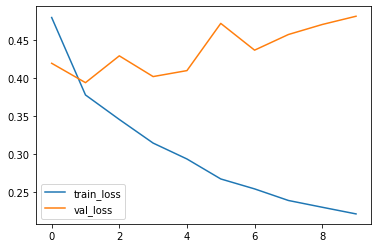

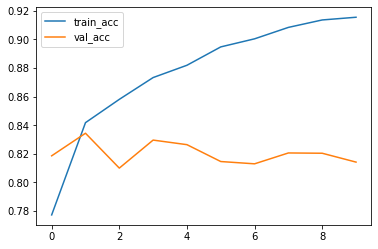

In [43]:
#train_loss vs. val_loss
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.legend(['train_loss', 'val_loss'])
plt.show()

#train_acc vs. val_acc
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.legend(['train_acc', 'val_acc'])
plt.show()

In [44]:
## 위의 그래프를 보면 과적합이 좀 발생했으므로 epoch를 5까지만 설정해 다시 학습 
model_ebd.fit(x_train_seq, y_train, epochs=5, batch_size=32)
#검증셋 평가
loss, acc = model_ebd.evaluate(x_val_seq, y_val)
print(acc)

Epoch 1/5
625/625 [==============================] - 10s 17ms/step - loss: 0.2237 - accuracy: 0.9160
Epoch 2/5
625/625 [==============================] - 11s 17ms/step - loss: 0.2032 - accuracy: 0.9241
Epoch 3/5
625/625 [==============================] - 10s 16ms/step - loss: 0.1932 - accuracy: 0.9291
Epoch 4/5
625/625 [==============================] - 11s 17ms/step - loss: 0.1961 - accuracy: 0.9272
Epoch 5/5
157/157 [==============================] - 1s 5ms/step - loss: 0.5203 - accuracy: 0.8098
0.8098000288009644


- 임베딩층을 사용하니 성능이 더욱 향상되었을 뿐 아니라(약 69% -> 약 80%)
- 심지어 단어 임베딩에서는 원래 원-핫 인코딩 100-> 단어 임베딩 32로 줄이고(메모리 사용량 절감), 순환층의 셀 개수도 32-> 8로 줄였으며, epoch 수도 20->5로 줄였는데도 성능이 더 향상되었다.
- 이렇게 __단어 임베딩은 효율적이고 성능이 뛰어나므로, 순환 신경망에서 텍스트 처리 시 이런 임베딩층을 기본으로 사용__한다.

## 09-4. LSTM 순환 신경망을 만들어 텍스트 분류
- 기존의 일반 순환 신경망보다 LSTM을 이용한 모델을 만들면 더욱 효과가 뛰어나다.
- LSTM 이론은 아주 복잡하지만 텐서플로를 이용하면 아주 간단하게 구현할 수 있다! (LSTM 순환 신경망은 SimpleRNN 클래스를 LSTM으로 바꾸기만 하면 된다.)

In [45]:
from tensorflow.keras.layers import LSTM

model_lstm = Sequential()
#단어 임베딩
model_lstm.add(Embedding(1000, 32))
#순환층 - LSTM (셀 개수:8)
model_lstm.add(LSTM(8))
#출력층
model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          32000     
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 1312      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 33,321
Trainable params: 33,321
Non-trainable params: 0
_________________________________________________________________


In [46]:
32*8*4 + 8*8*4 + 8*4

1312

In [47]:
#모델 컴파일
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#모델 훈련
his = model_lstm.fit(x_train_seq, y_train, epochs=10, batch_size=32, validation_data=(x_val_seq, y_val))

Epoch 1/10
625/625 [==============================] - 19s 28ms/step - loss: 0.5574 - accuracy: 0.7139 - val_loss: 0.3834 - val_accuracy: 0.8326
Epoch 2/10
625/625 [==============================] - 17s 27ms/step - loss: 0.3538 - accuracy: 0.8510 - val_loss: 0.3632 - val_accuracy: 0.8432
Epoch 3/10
625/625 [==============================] - 17s 27ms/step - loss: 0.3035 - accuracy: 0.8750 - val_loss: 0.3574 - val_accuracy: 0.8438
Epoch 4/10
625/625 [==============================] - 17s 27ms/step - loss: 0.2828 - accuracy: 0.8822 - val_loss: 0.3568 - val_accuracy: 0.8442
Epoch 5/10
625/625 [==============================] - 17s 27ms/step - loss: 0.2756 - accuracy: 0.8896 - val_loss: 0.3713 - val_accuracy: 0.8358
Epoch 6/10
625/625 [==============================] - 17s 27ms/step - loss: 0.2661 - accuracy: 0.8939 - val_loss: 0.3911 - val_accuracy: 0.8390
Epoch 7/10
625/625 [==============================] - 18s 28ms/step - loss: 0.2550 - accuracy: 0.8927 - val_loss: 0.3909 - val_accuracy:

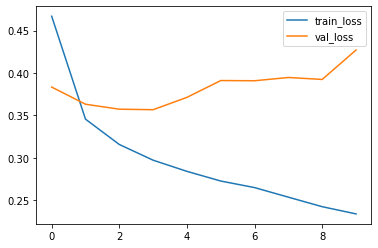

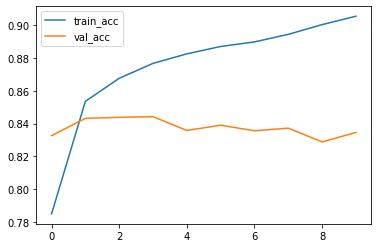

In [48]:
#train_loss vs. val_loss
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.legend(['train_loss', 'val_loss'])
plt.show()

#train_acc vs. val_acc
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.legend(['train_acc', 'val_acc'])
plt.show()

- 결과를 보면 역시 epoch가 얼마 지나지 않아 최고 성능을 내고는 성능이 그대로 유지되는 과적합이 발생하고 있다.

In [49]:
#검증셋 정확도 평가
loss, acc = model_lstm.evaluate(x_val_seq, y_val, verbose=0)
print(acc)

0.8345999717712402


- 이렇게 LSTM을 활용하면 좀 더 성능이 향상되는 것(80%-> 약 83%)을 확인할 수 있다. 하지만 일반 순환 신경망, LSTM 모두 여기선 과적합이 발생하므로 이를 막아야 할 듯.
- 더 좋은 성능을 내려면 하이퍼 파라미터 튜닝을 해야 한다. 단어 임베딩 층 or LSTM층의 셀 개수를 늘리면 더 좋은 효과가 날것이다.(근데 LSTM 층 셀 늘려봤을 때, 성능이 크게 증가하진 않았음)
- 또는 단어 임베딩 시 `Embedding` 외에 다른 기법들 활용하는 것도 성능 향상될것임.